In [1]:
from sympy import symbols, summation, oo

# Define the symbol
n = symbols('n')

# Define the summation expression
expression = 1 / (2*n - 1)

# Perform the summation from 1 to infinity
sum_result = summation(expression, (n, 1, oo))

sum_result


oo

In [2]:
import random

def single_simulate(n):
    
    # Initialising the rope and tail-end sets
    ropes = [(i, i + 1) for i in range(1, 2 * n, 2)]
    ends = list(range(1, 2 * n + 1))
    loops = []

    # simulation process
    while len(ends) > 0:  
        # Randomly selected two ends
        chosen_ends = random.sample(ends, 2)

        # Record the status of ropes, loops and remaining ends
        print(f"Current ropes: {ropes}")
        print(f"Remaining ends: {ends}")
        print(f"Current loops: {loops}")
        print(f"Chosen ends to tie: {chosen_ends}")
        
        # Find the rope to which the selected end belongs
        chosen_ropes = [rope for rope in ropes if chosen_ends[0] in rope or chosen_ends[1] in rope]
        
        if len(chosen_ropes) == 1:  # The two selected ends belong to the same rope, forming a loop
            loop = chosen_ropes[0]
            loops.append(loop)
            ropes.remove(loop)
            print(f"Tied {loop} to itself, forming a loop.")
        else:  # The selected ends belong to different ropes, merging the two ropes
            ropes.remove(chosen_ropes[0])
            ropes.remove(chosen_ropes[1])
            new_rope = tuple(sorted(chosen_ropes[0] + chosen_ropes[1]))
            ropes.append(new_rope)
            print(f"Combined {chosen_ropes[0]} and {chosen_ropes[1]} into {new_rope}.")

        # Remove already selected tails from the tails collection
        ends.remove(chosen_ends[0])
        ends.remove(chosen_ends[1])

    # Output the final result
    print(f"Final Loops: {loops}")
    print(f"Total number of loops formed: {len(loops)}")
    return ropes, loops, len(loops)

In [3]:
single_simulate(5)

Current ropes: [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]
Remaining ends: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Current loops: []
Chosen ends to tie: [5, 1]
Combined (1, 2) and (5, 6) into (1, 2, 5, 6).
Current ropes: [(3, 4), (7, 8), (9, 10), (1, 2, 5, 6)]
Remaining ends: [2, 3, 4, 6, 7, 8, 9, 10]
Current loops: []
Chosen ends to tie: [9, 2]
Combined (9, 10) and (1, 2, 5, 6) into (1, 2, 5, 6, 9, 10).
Current ropes: [(3, 4), (7, 8), (1, 2, 5, 6, 9, 10)]
Remaining ends: [3, 4, 6, 7, 8, 10]
Current loops: []
Chosen ends to tie: [3, 7]
Combined (3, 4) and (7, 8) into (3, 4, 7, 8).
Current ropes: [(1, 2, 5, 6, 9, 10), (3, 4, 7, 8)]
Remaining ends: [4, 6, 8, 10]
Current loops: []
Chosen ends to tie: [10, 6]
Tied (1, 2, 5, 6, 9, 10) to itself, forming a loop.
Current ropes: [(3, 4, 7, 8)]
Remaining ends: [4, 8]
Current loops: [(1, 2, 5, 6, 9, 10)]
Chosen ends to tie: [4, 8]
Tied (3, 4, 7, 8) to itself, forming a loop.
Final Loops: [(1, 2, 5, 6, 9, 10), (3, 4, 7, 8)]
Total number of loops formed: 2


([], [(1, 2, 5, 6, 9, 10), (3, 4, 7, 8)], 2)

In [4]:
def single_simulate_silent(n):
    ropes = [(i, i + 1) for i in range(1, 2 * n, 2)]
    ends = list(range(1, 2 * n + 1))
    loops = []

    while len(ends) > 0:  
        chosen_ends = random.sample(ends, 2)

        chosen_ropes = [rope for rope in ropes if chosen_ends[0] in rope or chosen_ends[1] in rope]
        
        if len(chosen_ropes) == 1:  
            loop = chosen_ropes[0]
            loops.append(loop)
            ropes.remove(loop)
        else:  
            ropes.remove(chosen_ropes[0])
            ropes.remove(chosen_ropes[1])
            new_rope = tuple(sorted(chosen_ropes[0] + chosen_ropes[1]))
            ropes.append(new_rope)

        ends.remove(chosen_ends[0])
        ends.remove(chosen_ends[1])

    return len(loops)

In [5]:
def simulate_multiple_times(n, simulations):
    
    results = [single_simulate_silent(n) for _ in range(simulations)]
    return results

In [6]:
simulate_multiple_times(5, 10)

[2, 3, 2, 2, 2, 3, 1, 2, 2, 2]

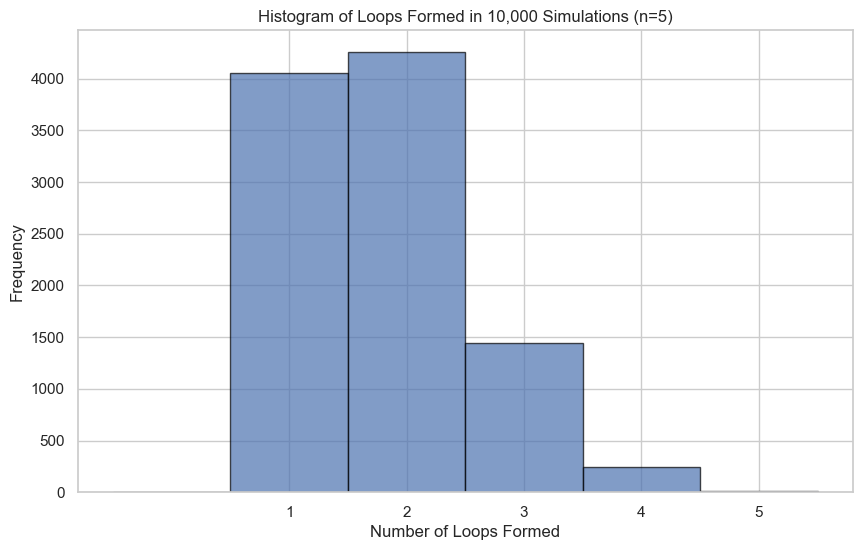

({1: 0.4054, 2: 0.4254, 3: 0.144, 4: 0.024, 5: 0.0012}, 1.7902)

In [22]:
# Running the simulation multiple times
results = simulate_multiple_times(5, 10000)

# Plotting the histogram of the simulation results
plt.figure(figsize=(10, 6))
bin_edges = [x - 0.5 for x in range(min(results) - 1, max(results) + 2)]
plt.hist(results, bins=bin_edges, alpha=0.7, edgecolor='black')
plt.title('Histogram of Loops Formed in 10,000 Simulations (n=5)')
plt.xlabel('Number of Loops Formed')
plt.ylabel('Frequency')
plt.xticks(range(min(results), max(results) + 1))
plt.show()

# Calculating and displaying the frequency of each result
frequency = {x: results.count(x) / len(results) for x in set(results)} 

# Calculating the mean value of the results
mean_value = sum(results) / len(results)

frequency, mean_value

In [14]:
import random

def single_simulate_silent_modified(n, max_steps):
    ropes = [(i, i + 1) for i in range(1, 2 * n, 2)]
    ends = list(range(1, 2 * n + 1))
    loops = []
    steps = 0 

    while len(ends) > 0 and steps < max_steps:  
        chosen_ends = random.sample(ends, 2)
        chosen_ropes = [rope for rope in ropes if chosen_ends[0] in rope or chosen_ends[1] in rope]
        
        if len(chosen_ropes) == 1:  
            loop = chosen_ropes[0]
            loops.append(loop)
            ropes.remove(loop)
        else:  
            ropes.remove(chosen_ropes[0])
            ropes.remove(chosen_ropes[1])
            new_rope = tuple(sorted(chosen_ropes[0] + chosen_ropes[1]))
            ropes.append(new_rope)

        ends.remove(chosen_ends[0])
        ends.remove(chosen_ends[1])
        steps += 1 
    return len(loops)


In [15]:
def simulate_multiple_times_modified(n, simulations, max_steps):
    
    results = [single_simulate_silent_modified(n, max_steps) for _ in range(simulations)]
    return results

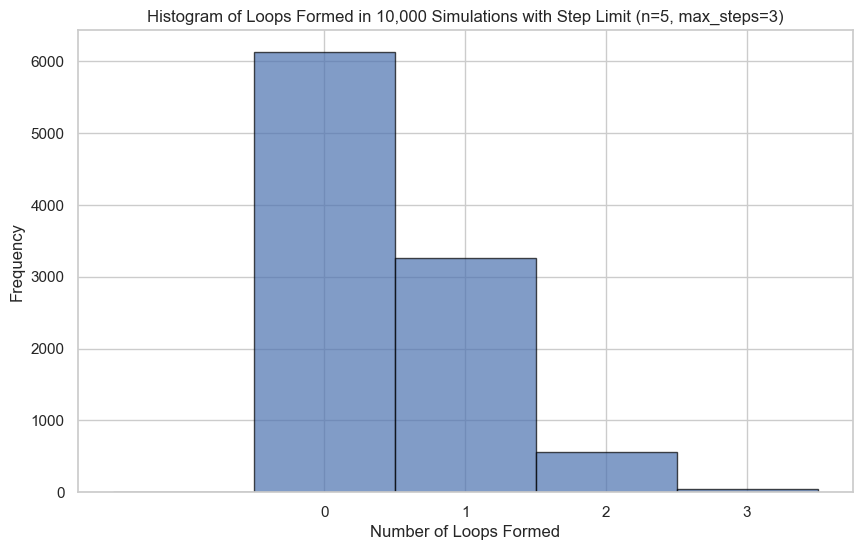

({0: 0.6127, 1: 0.3268, 2: 0.0566, 3: 0.0039}, 0.4517)

In [24]:
# Run simulations
results_1 = simulate_multiple_times_modified(5, 10000, 3)

# Plotting the histogram of the simulation results
plt.figure(figsize=(10, 6))
bin_edges_1 = [x - 0.5 for x in range(min(results_1) - 1, max(results_1) + 2)]
plt.hist(results_1, bins=bin_edges_1, alpha=0.7, edgecolor='black')
plt.title('Histogram of Loops Formed in 10,000 Simulations with Step Limit (n=5, max_steps=3)')
plt.xlabel('Number of Loops Formed')
plt.ylabel('Frequency')
plt.xticks(range(min(results_1), max(results_1) + 1))
plt.show()

# Calculating the frequency of each result
frequency_1= {x: results_1.count(x) / len(results_1) for x in set(results_1)}

# Calculating the mean value of the results
mean_value_1 = sum(results_1) / len(results_1)

frequency_1, mean_value_1